Доделать: лучше предобрабоать текст с помощью нлтк, чтобы были только начальные формы глаголов и визуализировать где векторная арифметика

In [1]:
import os
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anmrt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anmrt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яё\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [4]:
#ПРОБЛЕМА С КОДИРОВКОЙ У ПОСЛЕДНИХ ТРЕХ ФАЙЛОВ

In [5]:
# corpus = []

# with open('HP1RUS.txt', 'r', encoding='utf-8') as file:
#     lines = file.readlines()[7:]
# text = ' '.join(lines)
# processed_text = preprocess_text(text)
# sentences = nltk.sent_tokenize(processed_text, language='russian')
# corpus.extend(sentences)

# with open('HP2RUS.txt', 'r', encoding='utf-8') as file:
#     lines = file.readlines()[7:]
# text = ' '.join(lines)
# processed_text = preprocess_text(text)
# sentences = nltk.sent_tokenize(processed_text, language='russian')
# corpus.extend(sentences)

# with open('HP3RUS.txt', 'r', encoding='utf-8') as file:
#     lines = file.readlines()[6:]
# text = ' '.join(lines)
# processed_text = preprocess_text(text)
# sentences = nltk.sent_tokenize(processed_text, language='russian')
# corpus.extend(sentences)

# with open('HP4RUS.txt', 'r', encoding='utf-8') as file:
#     lines = file.readlines()[3:]
# text = ' '.join(lines)
# processed_text = preprocess_text(text)
# sentences = nltk.sent_tokenize(processed_text, language='russian')
# corpus.extend(sentences)

In [6]:
def tokenize_corpus(corpus):
    tokenized_corpus = []
    
    for sentence in corpus:
        tokens = word_tokenize(sentence, language='russian')
        
        # Удалить стоп-слова и короткие слова
        stop_words = set(stopwords.words('russian'))
        filtered_tokens = [
            token for token in tokens 
            if token not in stop_words and len(token) > 2
        ]
        
        if filtered_tokens:  # Добавить только непустые списки
            tokenized_corpus.append(filtered_tokens)
    
    return tokenized_corpus

In [7]:
def save_processed_data(tokenized_corpus, filename='processed_corpus.txt'):
    with open(filename, 'w', encoding='utf-8') as f:
        for tokens in tokenized_corpus:
            f.write(' '.join(tokens) + '\n')
    print("сохранено")
    print(filename)

In [8]:
with open('HP1RUS.txt', 'r', encoding='utf-8') as infile, \
     open('Data.txt', 'w', encoding='utf-8') as outfile:
    lines = infile.readlines()
    outfile.writelines(lines[7:])

In [9]:
with open('Data.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [10]:
processed_text = preprocess_text(text)
sentences = nltk.sent_tokenize(processed_text, language='russian')

In [11]:
print(len(sentences)) #вывод 1, поскольку это все 1 строка в обработанном тексте

1


In [12]:
print(sentences)

['мистер и миссис дарсли из дома номер четыре по бирючинному проезду могли бы с гордостью сказать что они слава богу совершенно нормальные люди они были бы последними от кого вы могли бы ожидать участия в чемнибудь странном и таинственном потому что они совершенно не одобряли подобной чепухи мистер дарсли работал директором фирмы граннингз которая выпускала сверла он был крупный крепкий мужчина с очень короткой шеей и очень большими усами миссис дарсли была худой и светловолосой зато ее шеи с лихвой хватило бы на двоих этим подарком природы она усердно пользовалась большую часть времени шпионя за соседями через садовые изгороди у дарсли рос сын дадли и они были уверены что лучшего мальчика не сыщешь на всем свете у дарсли было все что нужно но кроме того у них была тайна и больше всего они боялись что ктонибудь раскроет её они с ужасом представляли что случится если ктото вдруг узнает о поттерах миссис поттер приходилась миссис дарсли сестрой которую та не видела вот уже несколько лет 

In [13]:
tokenized_corpus = tokenize_corpus(sentences)

In [14]:
save_processed_data(tokenized_corpus)

сохранено
processed_corpus.txt


In [15]:
# Всего токенов
print(sum(len(tokens) for tokens in tokenized_corpus))

39978


In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [19]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,             # размер окна контекста
    min_count=3,          # минимальная частота слова
    sg=1,                 # алгоритм Skip-Gram (при 1) или CBOW (0)
    workers=4,            # количество ядер процессора
    epochs=20
)

In [20]:
print(len(model.wv.key_to_index)) # Размер словаря слов

3000


In [21]:
model.save("harry_potter_rus.model")

In [22]:
def print_similar_words(model, word, topn=10):
    if word in model.wv:
        similar = model.wv.most_similar(word, topn=topn)
        print(f"\nБлижайшие слова к '{word}':")
        for i, (similar_word, similarity) in enumerate(similar, 1):
            print(f"{i:2d}. {similar_word:<15} {similarity:.4f}")

In [23]:
characters = ['гарри', 'гермиона', 'рон', 'волдеморт', 'снейп', 'мальфой']
for character in characters:
    print_similar_words(model, character)


Ближайшие слова к 'гарри':
 1. оба             0.9615
 2. купил           0.9606
 3. маггл           0.9581
 4. волшебник       0.9580
 5. тобой           0.9558
 6. внезапно        0.9552
 7. мальчишка       0.9552
 8. понял           0.9550
 9. слышал          0.9539
10. снова           0.9537

Ближайшие слова к 'гермиона':
 1. помнит          0.9950
 2. невилл          0.9949
 3. видели          0.9947
 4. которыми        0.9944
 5. зубы            0.9944
 6. привет          0.9943
 7. будут           0.9942
 8. спрашивать      0.9942
 9. слухи           0.9941
10. жабы            0.9941

Ближайшие слова к 'рон':
 1. слышал          0.9833
 2. близнецов       0.9828
 3. таким           0.9818
 4. спасибо         0.9810
 5. близнец         0.9809
 6. близнецы        0.9794
 7. место           0.9789
 8. пришел          0.9787
 9. рона            0.9778
10. плечу           0.9768

Ближайшие слова к 'волдеморт':
 1. скажет          0.9958
 2. волдеморта      0.9958
 3. ночи           

In [24]:
test_words = ['гарри', 'гермиона', 'рон', 'малфой', 'волдеморт', 'дамблдор']
for word in test_words:
    if word in model.wv:
        print(f"Слово '{word}' есть в словаре")
    else:
        print(f"Слова '{word}' нет в словаре")

Слово 'гарри' есть в словаре
Слово 'гермиона' есть в словаре
Слово 'рон' есть в словаре
Слово 'малфой' есть в словаре
Слово 'волдеморт' есть в словаре
Слово 'дамблдор' есть в словаре


In [25]:
# Векторная арифметика
def word_analogy(model, positive, negative, topn=5):
    result = model.wv.most_similar(positive=positive, negative=negative, topn=topn)
    print(f"\nАналогия: {positive} - {negative} = ?")
    for i, (word, similarity) in enumerate(result, 1):
        print(f"{i:2d}. {word:<15} {similarity:.4f}")
    return result

In [26]:
word_analogy(model, positive=['гарри', 'гриффиндор'], negative=['малфой'])
word_analogy(model, positive=['дамблдор', 'добрый'], negative=['снейп'])
word_analogy(model, positive=['волдеморт', 'злой'], negative=['гарри'])


Аналогия: ['гарри', 'гриффиндор'] - ['малфой'] = ?
 1. купил           0.9595
 2. понял           0.9576
 3. маггл           0.9572
 4. оба             0.9563
 5. прочитать       0.9536

Аналогия: ['дамблдор', 'добрый'] - ['снейп'] = ?
 1. сюда            0.8818
 2. кивнул          0.8813
 3. волдеморт       0.8798
 4. мотоцикл        0.8793
 5. стену           0.8787

Аналогия: ['волдеморт', 'злой'] - ['гарри'] = ?
 1. стене           0.9604
 2. первого         0.9571
 3. ученикам        0.9548
 4. сидели          0.9547
 5. вся             0.9530


[('стене', 0.9603931903839111),
 ('первого', 0.9571321606636047),
 ('ученикам', 0.9548428058624268),
 ('сидели', 0.9547473788261414),
 ('вся', 0.9530287384986877)]

In [27]:
def visualize_words(model, words_to_visualize, figsize=(12, 10)):
    words = []
    vectors = []
    
    for word in words_to_visualize:
        if word in model.wv:
            words.append(word)
            vectors.append(model.wv[word])
    
    if len(vectors) < 2:
        print("Недостаточно слов для визуализации")
        return
    
    vectors = np.array(vectors)
    
    pca = PCA(n_components=2) # PCA для уменьшения размерности до 2D
    reduced_vectors = pca.fit_transform(vectors)
    
    plt.figure(figsize=figsize)
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)
    
    for i, word in enumerate(words):
        plt.annotate(word, 
                    (reduced_vectors[i, 0], reduced_vectors[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=12,
                    alpha=0.8)
    
    plt.title('Word2Vec')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return reduced_vectors

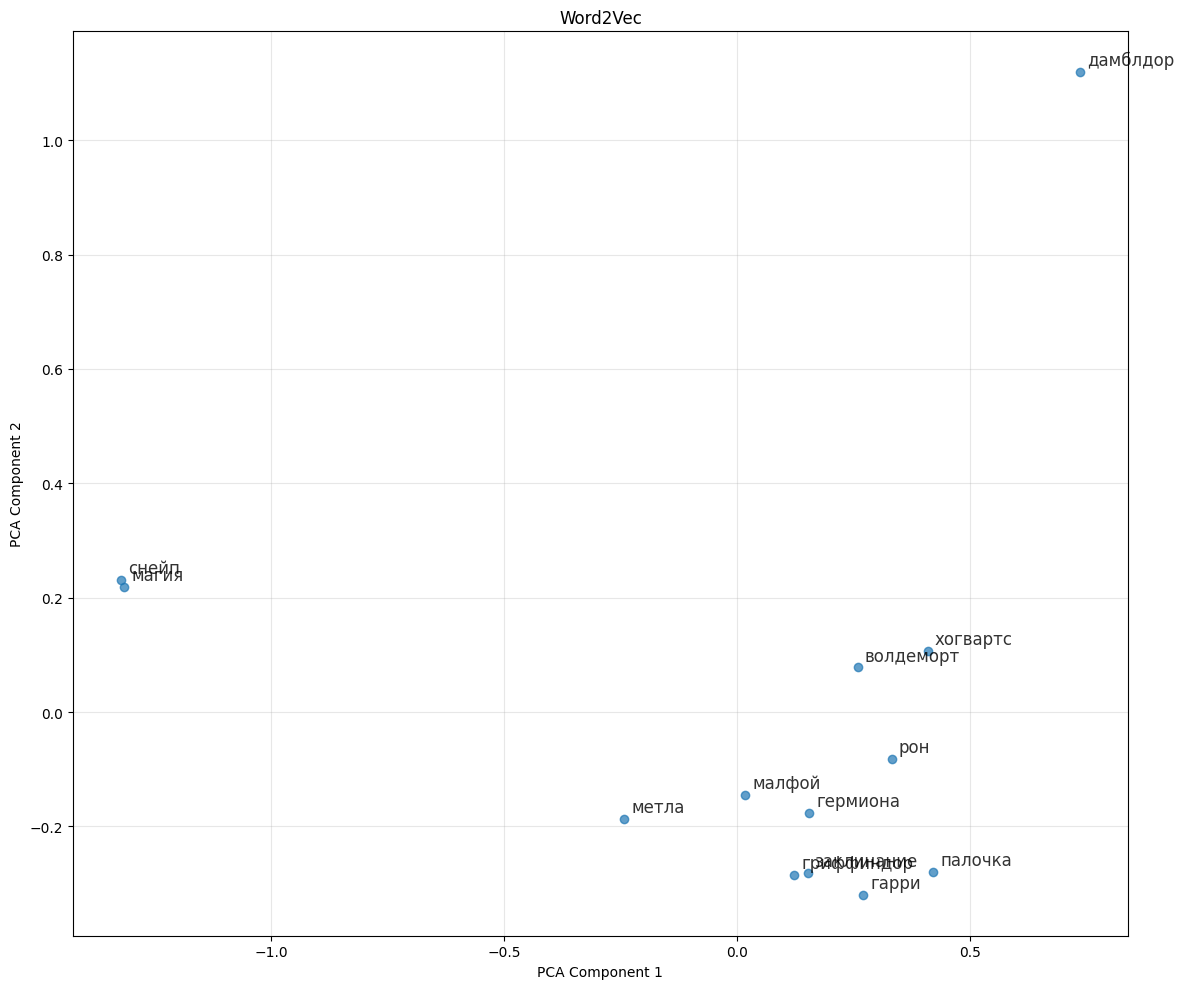

In [28]:
key_words = [
    'гарри', 'гермиона', 'рон', 'дамблдор', 'волдеморт', 
    'снейп', 'малфой', 'хогвартс', 'гриффиндор', 'слизерин',
    'заклинание', 'палочка', 'метла', 'квидич', 'магия'
]

reduced_vectors = visualize_words(model, key_words)

In [29]:
good_characters = ['гарри', 'гермиона', 'рон', 'дumbledор', 'хагрид']
bad_characters = ['волдеморт', 'мальфой', 'снейп']  # Снейп под вопросом
hogwarts_houses = ['гриффиндор', 'слизерин', 'когтевран', 'пуффендуй']

print("\nПоложительные персонажи:")
for char in good_characters:
    print_similar_words(model, char, topn=5)

print("\nОтрицательные персонажи:")
for char in bad_characters:
    print_similar_words(model, char, topn=5)


Положительные персонажи:

Ближайшие слова к 'гарри':
 1. оба             0.9615
 2. купил           0.9606
 3. маггл           0.9581
 4. волшебник       0.9580
 5. тобой           0.9558

Ближайшие слова к 'гермиона':
 1. помнит          0.9950
 2. невилл          0.9949
 3. видели          0.9947
 4. которыми        0.9944
 5. зубы            0.9944

Ближайшие слова к 'рон':
 1. слышал          0.9833
 2. близнецов       0.9828
 3. таким           0.9818
 4. спасибо         0.9810
 5. близнец         0.9809

Ближайшие слова к 'хагрид':
 1. хогвартсе       0.9380
 2. спросил         0.9339
 3. знаю            0.9313
 4. рон             0.9265
 5. сэр             0.9265

Отрицательные персонажи:

Ближайшие слова к 'волдеморт':
 1. скажет          0.9958
 2. волдеморта      0.9958
 3. ночи            0.9955
 4. вперед          0.9947
 5. прошептала      0.9942

Ближайшие слова к 'снейп':
 1. сказало         0.3006
 2. оборотень       0.2659
 3. короткие        0.2497
 4. пошевелить    

In [30]:
# Cемантические расстояния между персонажами
def calculate_similarity(model, word1, word2):
    if word1 in model.wv and word2 in model.wv:
        similarity = model.wv.similarity(word1, word2)
        print(f"Схожесть между '{word1}' и '{word2}': {similarity:.4f}")
        return similarity

In [31]:
calculate_similarity(model, 'гарри', 'гермиона')
calculate_similarity(model, 'гарри', 'рон')
calculate_similarity(model, 'гарри', 'малфой')
calculate_similarity(model, 'гарри', 'волдеморт')
calculate_similarity(model, 'снейп', 'дамблдор')
calculate_similarity(model, 'снейп', 'волдеморт')

Схожесть между 'гарри' и 'гермиона': 0.8924
Схожесть между 'гарри' и 'рон': 0.9385
Схожесть между 'гарри' и 'малфой': 0.9110
Схожесть между 'гарри' и 'волдеморт': 0.8876
Схожесть между 'снейп' и 'дамблдор': -0.0131
Схожесть между 'снейп' и 'волдеморт': -0.0581


np.float32(-0.058115292)

In [32]:
# Поиск слов, которые находятся между двумя концепциями
def find_between_words(model, word1, word2, topn=10):
    if word1 in model.wv and word2 in model.wv:
        result = model.wv.most_similar(positive=[word1, word2], topn=topn)
        print(f"\nСлова между '{word1}' и '{word2}':")
        for i, (word, similarity) in enumerate(result, 1):
            print(f"{i:2d}. {word:<15} {similarity:.4f}")

In [33]:
find_between_words(model, 'дамблдор', 'волдеморт')


Слова между 'дамблдор' и 'волдеморт':
 1. альбус          0.9833
 2. исчез           0.9801
 3. кивнул          0.9750
 4. сюда            0.9673
 5. лили            0.9659
 6. мотоцикл        0.9648
 7. магглы          0.9636
 8. джеймс          0.9621
 9. знаете          0.9618
10. хогвартсе       0.9612


In [34]:
find_between_words(model, 'гарри', 'гриффиндор')


Слова между 'гарри' и 'гриффиндор':
 1. рона            0.9900
 2. мальчишка       0.9899
 3. маггл           0.9895
 4. интересом       0.9894
 5. ммм             0.9891
 6. указывая        0.9889
 7. провалиться     0.9888
 8. остановит       0.9885
 9. унитаз          0.9882
10. близнецы        0.9882


In [35]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:
import pandas as pd

In [38]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import nbformat

In [54]:
def interactive_plotly_visualization(model, words_list, title="Word2Vec 3d"):
    # Получение векторов
    words = []
    vectors = []
    for word in words_list:
        if word in model.wv:
            words.append(word)
            vectors.append(model.wv[word])
    
    vectors = np.array(vectors)
    
    # PCA для 3 компонентов
    pca = PCA(n_components=3)
    vectors_3d = pca.fit_transform(vectors)
    
    # Отдельный датафрейм
    df = pd.DataFrame(vectors_3d, columns=['x', 'y', 'z'])
    df['word'] = words
    df['cluster'] = [word.split('_')[0] if '_' in word else 'other' for word in words]
    
    fig = px.scatter_3d(
        df, x='x', y='y', z='z', 
        text='word',
        title=title,
        hover_name='word',
        size_max=18,
        opacity=0.8
    )
    
    fig.update_traces(
        textposition='top center',
        marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey'))
    )
    
    fig.show()
    
    return df

In [55]:
character_words = [
    'гарри', 'гермиона', 'рон', 'дамблдор', 'волдеморт',
    'снейп', 'малфой', 'хагрид', 'невилл', 'луна'
]
interactive_plotly_visualization(model, character_words)

,x,y,z,word,cluster
0,0.071997,-0.539753,0.276868,гарри,other
1,-0.089576,-0.204186,-0.284963,гермиона,other
2,0.153373,-0.222533,0.042071,рон,other
3,0.804507,0.878940,-0.114999,дамблдор,other
4,0.077675,0.000938,-0.228048,волдеморт,other
5,-1.383834,0.494645,0.180069,снейп,other
6,-0.196736,-0.165190,-0.139206,малфой,other
7,0.519444,0.021002,0.563823,хагрид,other
8,0.043152,-0.263863,-0.295615,невилл,other


In [45]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [52]:
def similarity_heatmap(model, words_list, figsize=(12, 10)):    
    # Фильтрация слов, которые есть в модели
    valid_words = [word for word in words_list if word in model.wv]
    
    similarity_matrix = np.zeros((len(valid_words), len(valid_words)))
    
    for i, word1 in enumerate(valid_words):
        for j, word2 in enumerate(valid_words):
            similarity_matrix[i, j] = model.wv.similarity(word1, word2)
    
    plt.figure(figsize=figsize)
    
    cmap = LinearSegmentedColormap.from_list('custom_red_blue', ['#1f77b4', '#ffffff', '#d62728'])
    
    sns.heatmap(
        similarity_matrix,
        xticklabels=valid_words,
        yticklabels=valid_words,
        annot=True,
        fmt='.2f',
        cmap=cmap,
        center=0.5,
        square=True,
        cbar_kws={'label': 'Семантическая схожесть'}
    )
    
    plt.title('Тепловавя карта')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return similarity_matrix, valid_words

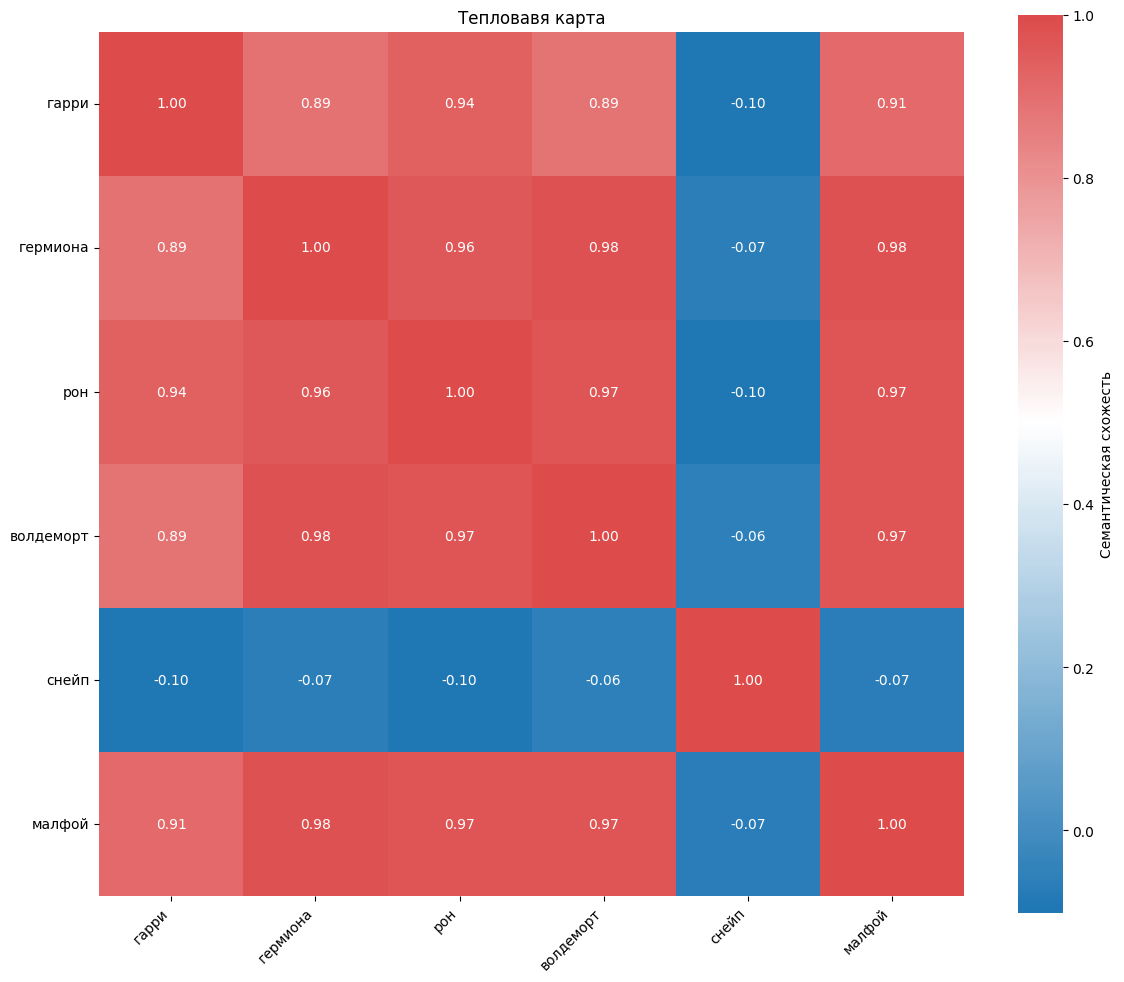

In [53]:
main_characters = ['гарри', 'гермиона', 'рон', 'дамблдорр', 'волдеморт', 'снейп', 'малфой']
similarity_matrix, words = similarity_heatmap(model, main_characters)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [56]:
def word_dendrogram(model, words_list, method='ward', figsize=(15, 10)):
    valid_words = [word for word in words_list if word in model.wv]
    vectors = [model.wv[word] for word in valid_words]
    
    # Расстояния
    distance_matrix = pdist(vectors, metric='cosine')
    
    # Иерархическая кластеризация
    linkage_matrix = linkage(distance_matrix, method=method)
    
    plt.figure(figsize=figsize)
    dendrogram(
        linkage_matrix,
        labels=valid_words,
        orientation='right',
        leaf_font_size=12,
        color_threshold=0.7 * max(linkage_matrix[:, 2])
    )
    
    plt.title('Дендрограмма кластеризации слов')
    plt.xlabel('Расстояние')
    plt.tight_layout()
    plt.show()
    
    return linkage_matrix

thematic_words = [
    'гарри', 'гермиона', 'рон',
    'дамблдор', 'снейп', 'макгонагалл',
    'волдеморт', 'малфой', 'болот',
    'хогвартс', 'гриффиндор', 'слизерин',
    'заклинание', 'палочка', 'метла',
    'квидич', 'матч', 'гонг',
]

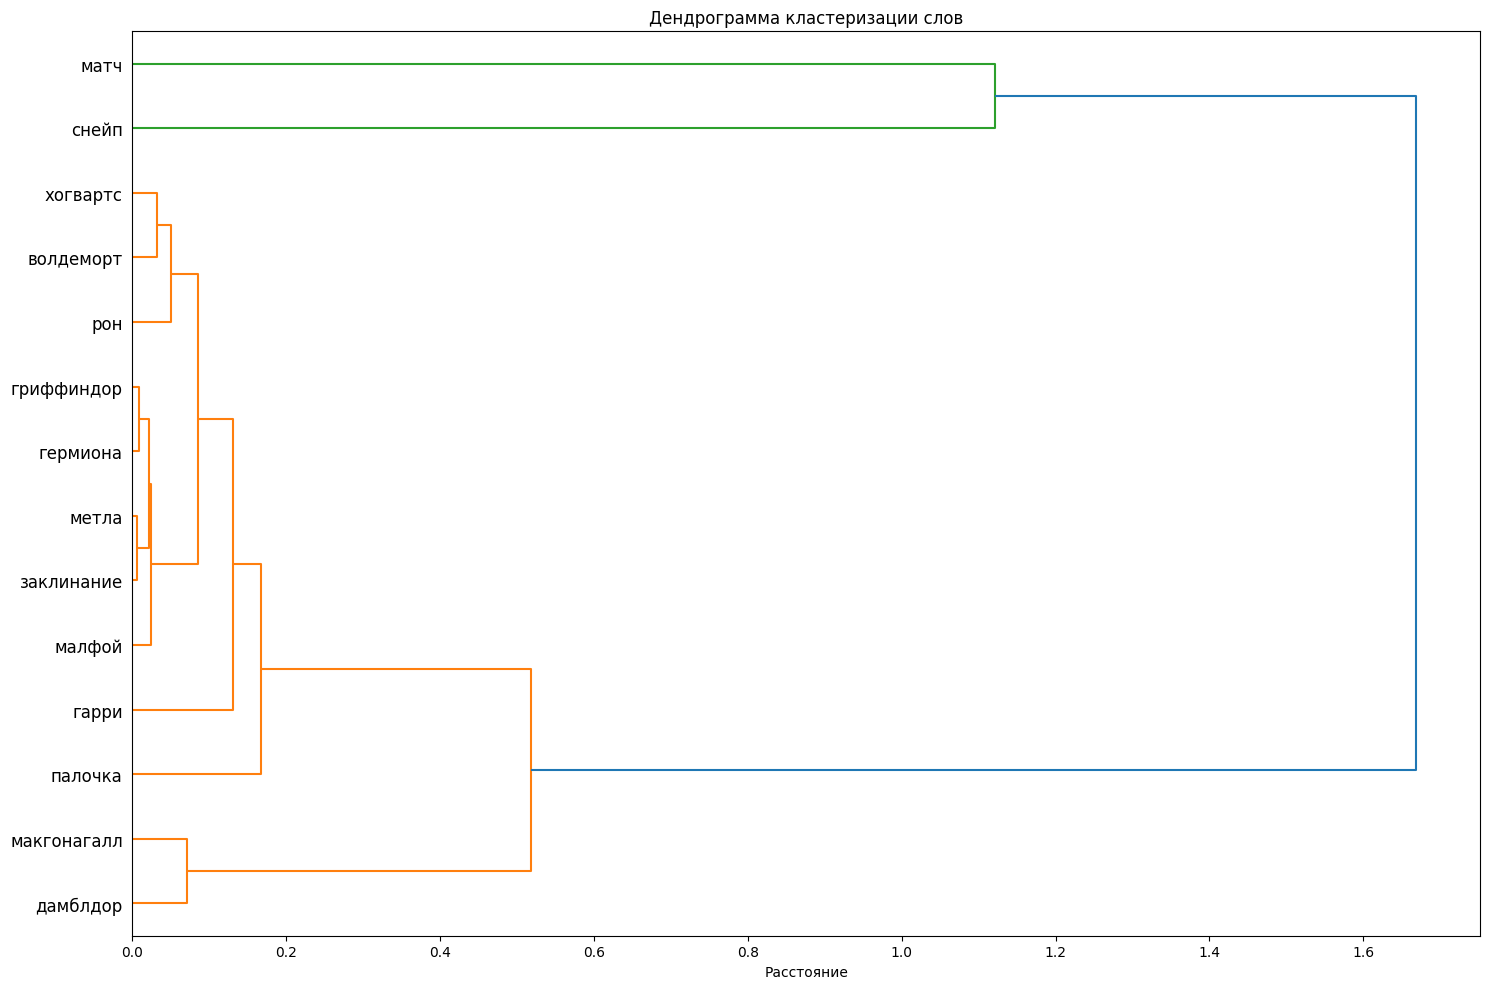

In [57]:
linkage_matrix = word_dendrogram(model, thematic_words)